# lbp-比較對比度不同的灰階圖

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

### 載入剛剛介紹的lbp、showImage、showHist和transparentMask（這裡就不展開介紹，有興趣請自行參閱）

In [2]:
%run base/base.ipynb

# 使用4張不同對比度的灰階圖來比較經過LBP運算過的特徵圖
---

## __1.__ 首先分別載入`./img`裡的人臉，仔細看可以發現這四張圖是同一張圖只是對比度不同

In [3]:
ori_img=cv.imread('./img/ori_face.jpg')
gray_img=cv.imread('./img/gray_img.jpg')
contrast_4_gray_img=cv.imread('./img/contrast_0.4_gray_img.jpg')
contrast_2_gray_img=cv.imread('./img/contrast_0.2_gray_img.jpg')
contrast_1_gray_img=cv.imread('./img/contrast_0.1_gray_img.jpg')

#因為.jpg影像檔載入後為3通道，所以需要將這些影像轉為單通道
gray_img=cv.cvtColor(gray_img,cv.COLOR_BGR2GRAY)
contrast_4_gray_img=cv.cvtColor(contrast_4_gray_img,cv.COLOR_BGR2GRAY)
contrast_2_gray_img=cv.cvtColor(contrast_2_gray_img,cv.COLOR_BGR2GRAY)
contrast_1_gray_img=cv.cvtColor(contrast_1_gray_img,cv.COLOR_BGR2GRAY)


#載入去背過後的人臉，用來製作遮罩
gray_img_without_background=cv.imread('./img/face_without_background.png',cv.IMREAD_UNCHANGED)



## __2.__ 接下來分別對這四張灰階圖做 __lbp__<span style="color:blue"> (要記得丟進去圖要轉為灰階喔!!!)</span>



In [4]:
lbp_gray_img=lbp(gray_img)
lbp_contrast_4_gray_img=lbp(contrast_4_gray_img)
lbp_contrast_2_gray_img=lbp(contrast_2_gray_img)
lbp_contrast_1_gray_img=lbp(contrast_1_gray_img)

## __3.__ 製作去背影像的背景遮罩

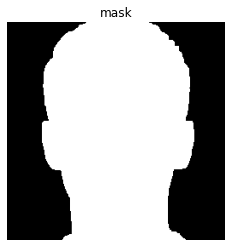

In [5]:
mask=transparentMask(gray_img_without_background)
showImage(mask,"mask")

## __4.__ 將做好的lbp圖與原圖分別套上遮罩做成直方圖並比較結果

In [59]:
#原圖做直方圖
gray_hist = cv.calcHist([gray_img], [0], mask, [256], [0, 256])
contrast_4_gray_hist = cv.calcHist([contrast_4_gray_img], [0], mask, [256], [0, 256])
contrast_2_gray_hist = cv.calcHist([contrast_2_gray_img], [0], mask, [256], [0, 256])
contrast_1_gray_hist = cv.calcHist([contrast_1_gray_img], [0], mask, [256], [0, 256])

#lbp圖做直方圖
lbp_gray_hist = cv.calcHist([lbp_gray_img], [0], mask, [256], [0, 256])
lbp_contrast_4_gray_hist = cv.calcHist([lbp_contrast_4_gray_img], [0], mask, [256], [0, 256])
lbp_contrast_2_gray_hist = cv.calcHist([lbp_contrast_2_gray_img], [0], mask, [256], [0, 256])
lbp_contrast_1_gray_hist = cv.calcHist([lbp_contrast_1_gray_img], [0], mask, [256], [0, 256])


## __5.__ 最後就把圖用matplotlib展示出來，並觀察其中的差別，與相似之處

### <span style="color:red">__!!!因為matplotlib 要 show 圖時計算的時間會有點久，所以需要等一下喔__~</span>

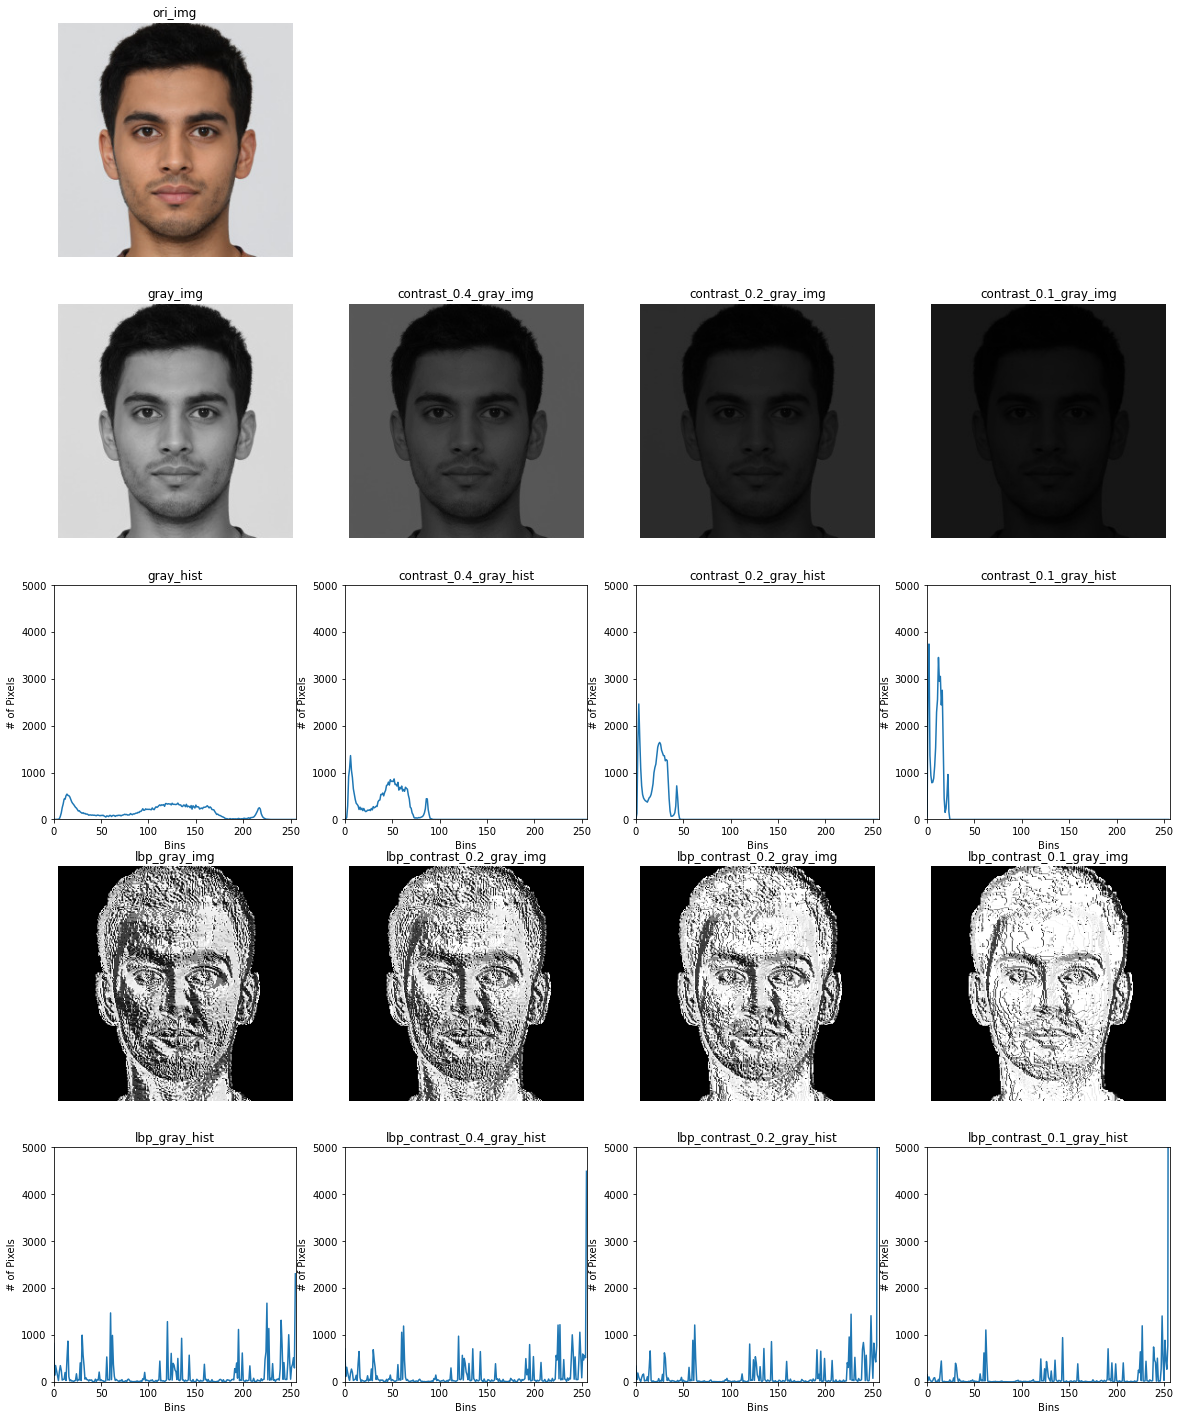

In [60]:

plt.figure(figsize=(20,25))
row=5
col=4

#定義y軸極限
y_limit=5000

#將要顯示的圖顯示出來
showImage(ori_img,'ori_img',sub_row=row,sub_col=col,sub_num=1)
showImage(gray_img,'gray_img',sub_row=row,sub_col=col,sub_num=5)
showImage(contrast_4_gray_img,'contrast_0.4_gray_img',sub_row=row,sub_col=col,sub_num=6)
showImage(contrast_2_gray_img,'contrast_0.2_gray_img',sub_row=row,sub_col=col,sub_num=7)
showImage(contrast_1_gray_img,'contrast_0.1_gray_img',sub_row=row,sub_col=col,sub_num=8)

showHist(gray_hist,"gray_hist",sub_row=row,sub_col=col,sub_num=9,y_limit=y_limit)
showHist(contrast_4_gray_hist,"contrast_0.4_gray_hist",sub_row=row,sub_col=col,sub_num=10,y_limit=y_limit)
showHist(contrast_2_gray_hist,"contrast_0.2_gray_hist",sub_row=row,sub_col=col,sub_num=11,y_limit=y_limit)
showHist(contrast_1_gray_hist,"contrast_0.1_gray_hist",sub_row=row,sub_col=col,sub_num=12,y_limit=y_limit)

#將lbp圖套上mask
lbp_gray_img_with_mask=cv.bitwise_and(mask,lbp_gray_img,mask=mask)
lbp_contrast_4_gray_img_with_mask=cv.bitwise_and(mask,lbp_contrast_4_gray_img,mask=mask)
lbp_contrast_2_gray_img_with_mask=cv.bitwise_and(mask,lbp_contrast_2_gray_img,mask=mask)
lbp_contrast_1_gray_img_with_mask=cv.bitwise_and(mask,lbp_contrast_1_gray_img,mask=mask)

cv.destroyAllWindows()
showImage(lbp_gray_img_with_mask,'lbp_gray_img',sub_row=row,sub_col=col,sub_num=13)
showImage(lbp_contrast_4_gray_img_with_mask,'lbp_contrast_0.2_gray_img',sub_row=row,sub_col=col,sub_num=14)
showImage(lbp_contrast_2_gray_img_with_mask,'lbp_contrast_0.2_gray_img',sub_row=row,sub_col=col,sub_num=15)
showImage(lbp_contrast_1_gray_img_with_mask,'lbp_contrast_0.1_gray_img',sub_row=row,sub_col=col,sub_num=16)


#顯示直方圖表
showHist(lbp_gray_hist,"lbp_gray_hist",sub_row=row,sub_col=4,sub_num=17,y_limit=y_limit)
showHist(lbp_contrast_4_gray_hist,"lbp_contrast_0.4_gray_hist",sub_row=row,sub_col=4,sub_num=18,y_limit=y_limit)
showHist(lbp_contrast_2_gray_hist,"lbp_contrast_0.2_gray_hist",sub_row=row,sub_col=4,sub_num=19,y_limit=y_limit)
showHist(lbp_contrast_1_gray_hist,"lbp_contrast_0.1_gray_hist",sub_row=row,sub_col=4,sub_num=20,y_limit=y_limit)

plt.show()


## __5.__ 將以上<span style="color:red">原圖</span>的直方圖做比較，顏色分別表示為

<span style="color:blue">藍色:</span>gray_hist

<span style="color:red">紅色:</span>contrast_0.4_gray_hist

<span style="color:green">綠色:</span>contrast_0.2_gray_hist

<span style="color:yellow">黃色:</span>contrast_0.1_gray_hist

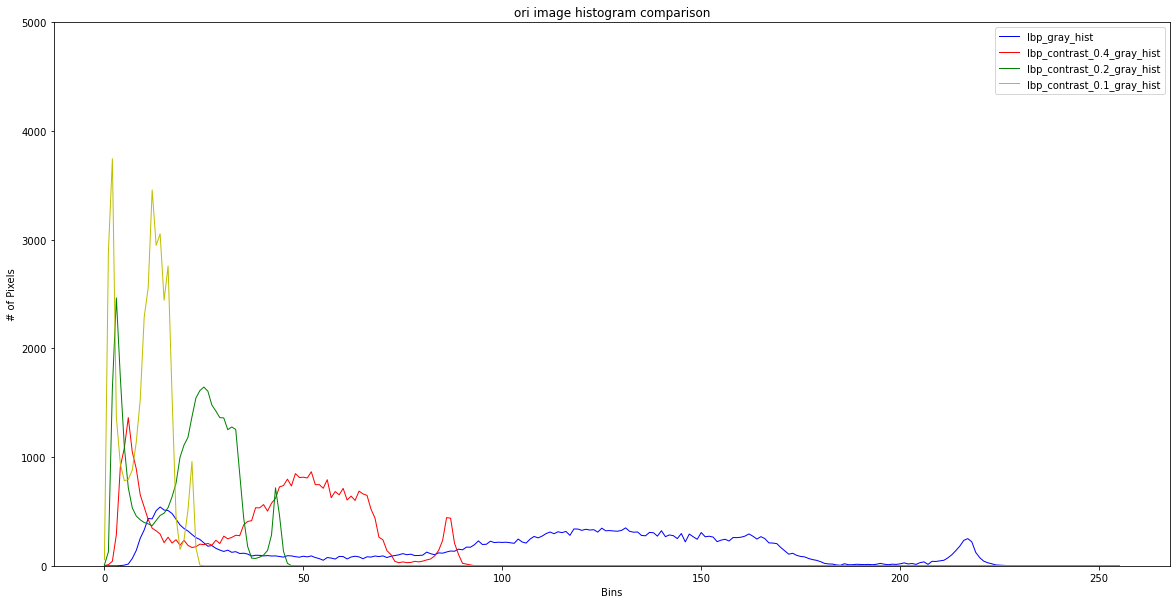

In [61]:
plt.figure(figsize=(20,10))

plt.plot(gray_hist, color='b', label='lbp_gray_hist',linewidth=1)
plt.plot(contrast_4_gray_hist, color='r', label='lbp_contrast_0.4_gray_hist',linewidth=1)
plt.plot(contrast_2_gray_hist, color='g', label='lbp_contrast_0.2_gray_hist',linewidth=1)
plt.plot(contrast_1_gray_hist, color='y', label='lbp_contrast_0.1_gray_hist',linewidth=1)

plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.legend()
plt.title('ori image histogram comparison')
plt.ylim([0, y_limit])
plt.show()

## __6.__ 將以上<span style="color:red">lbp</span>的直方圖做比較，顏色分別表示為

<span style="color:blue">藍色:</span>lbp_gray_hist

<span style="color:red">紅色:</span>lbp_contrast_0.4_gray_hist

<span style="color:green">綠色:</span>lbp_contrast_0.2_gray_hist

<span style="color:yellow">黃色:</span>lbp_contrast_0.1_gray_hist

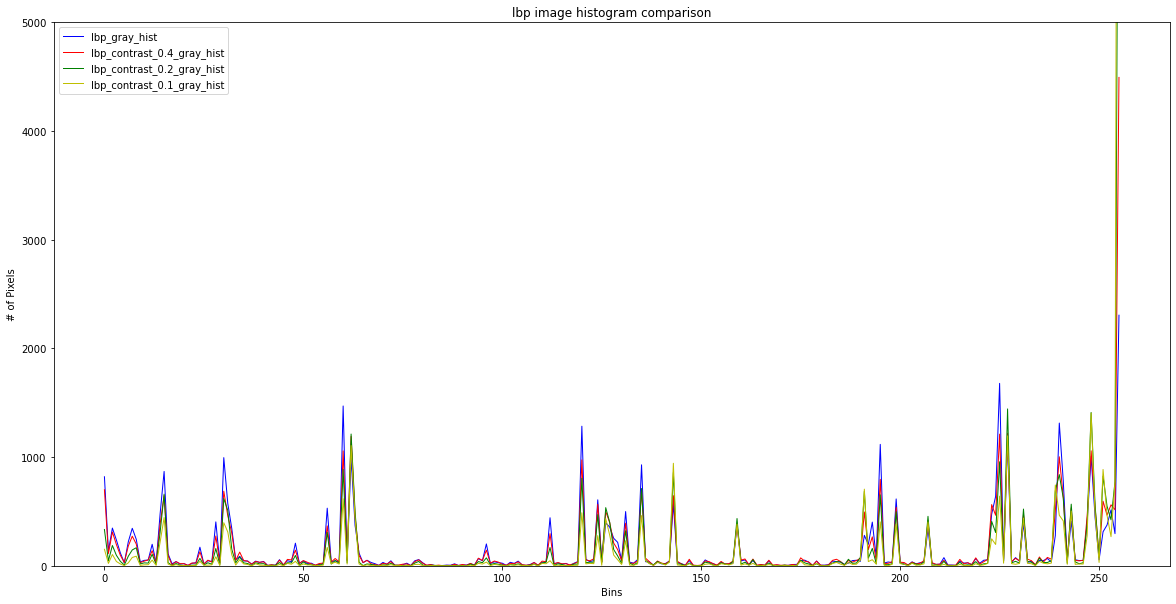

0.6773766510154058


In [62]:
plt.figure(figsize=(20,10))

plt.plot(lbp_gray_hist, color='b', label='lbp_gray_hist',linewidth=1)
plt.plot(lbp_contrast_4_gray_hist, color='r', label='lbp_contrast_0.4_gray_hist',linewidth=1)
plt.plot(lbp_contrast_2_gray_hist, color='g', label='lbp_contrast_0.2_gray_hist',linewidth=1)
plt.plot(lbp_contrast_1_gray_hist, color='y', label='lbp_contrast_0.1_gray_hist',linewidth=1)

plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.legend()
plt.title('lbp image histogram comparison')
plt.ylim([0, y_limit])
plt.show()


lbp_gray_hist_copy=lbp_gray_hist.copy()
lbp_contrast_2_gray_hist_copy=lbp_contrast_2_gray_hist.copy()
#cv.normalize(lbp_gray_hist,lbp_gray_hist_copy,1,0,cv.NORM_L1)
#cv.normalize(lbp_contrast_2_gray_hist,lbp_contrast_2_gray_hist_copy,1,0,cv.NORM_L1)
print(cv.compareHist(lbp_gray_hist_copy,gray_hist,cv.HISTCMP_BHATTACHARYYA))

## __7.__ 最後使用OpenCV內建的`compareHist`比較直方圖的匹配程度
在說明程式碼之前先來說說直方圖比較的方法，這個內建的函式提供了四種比較的方法:

相關法(cv.HISTCMP_CORREL):高分比低分還要匹配，完全匹配的分數為1，最不匹配的分數是-1；0代表無相關性。

卡方法(cv.HISTCMP_CHISQR_ALT):低分代表比高分還要匹配。完全匹配分數是0，而完全不匹配是無限的(取決於直方圖的大小)

相交法(cv.HISTCMP_INTERSECT):高分代表有很好的匹配程度，低分代表匹配不良。<span style="color:red">如果兩個直方圖都被__正規化為1__，完全匹配是1，完全布匹配是0。</span>

巴士距離法(cv.HISTCMP_BHATTACHARYYA):低分代表良好的匹配，高分代表不良匹配。完全匹配是0，完全不匹配是1



<span style="color:red">另外我會做相交法(cv.HISTCMP_INTERSECT)經過正規化的比較。</span>

In [63]:
#因為這裡要比較的直方圖有點多，所以只拿一些做示範，其餘的可以自行嘗試。

#compare_value=cv.compareHist(hist1,hist2,method)
#compare_value:比較結果
#hist1,hist2:要進行比較的兩個直方圖
#method:以上說明的四種方法
compare_value=cv.compareHist(lbp_gray_hist,lbp_gray_hist,cv.HISTCMP_CORREL)
print("lbp_gray_hist & lbp_gray_hist(跟自己比較) :", compare_value)
compare_value=cv.compareHist(lbp_gray_hist,gray_hist,cv.HISTCMP_CORREL)
print("lbp_gray_hist & gray_hist:", compare_value)
compare_value=cv.compareHist(lbp_gray_hist,lbp_contrast_2_gray_hist,cv.HISTCMP_CORREL)
print("lbp_gray_hist & lbp_contrast_2_gray_hist :", compare_value)


lbp_gray_hist & lbp_gray_hist(跟自己比較) : 1.0
lbp_gray_hist & gray_hist: -0.12616516299912992
lbp_gray_hist & lbp_contrast_2_gray_hist : 0.7340044599142695


### 相交法(cv.HISTCMP_INTERSECT)經過正規化的比較

In [65]:
#因為經過正規化會將舊有的直方圖數據更改，所以先複製舊的直方圖到新的變數
lbp_gray_hist_copy=lbp_gray_hist.copy()
gray_hist_copy=gray_hist.copy()
lbp_contrast_2_gray_hist_copy=lbp_contrast_2_gray_hist.copy()


#cv.normalize(src_img,dst_img,1,0,cv.NORM_L)
#src_img:要做正規化的直方圖
#src_img:輸出結果
cv.normalize(lbp_gray_hist,lbp_gray_hist_copy,1,0,cv.NORM_L1)
cv.normalize(gray_hist,gray_hist_copy,1,0,cv.NORM_L1)
cv.normalize(lbp_contrast_2_gray_hist,lbp_contrast_2_gray_hist_copy,1,0,cv.NORM_L1)



compare_value=cv.compareHist(lbp_gray_hist_copy,lbp_gray_hist_copy,cv.HISTCMP_INTERSECT)
print("lbp_gray_hist & lbp_gray_hist(跟自己比較) :", compare_value)
compare_value=cv.compareHist(lbp_gray_hist_copy,gray_hist_copy,cv.HISTCMP_INTERSECT)
print("lbp_gray_hist & gray_hist:", compare_value)
compare_value=cv.compareHist(lbp_gray_hist_copy,lbp_contrast_2_gray_hist_copy,cv.HISTCMP_INTERSECT)
print("lbp_gray_hist & lbp_contrast_2_gray_hist :", compare_value)

lbp_gray_hist & lbp_gray_hist(跟自己比較) : 0.9999999739229679
lbp_gray_hist & gray_hist: 0.28345368773443624
lbp_gray_hist & lbp_contrast_2_gray_hist : 0.7158028679550625
